In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from pandas import json_normalize
from mplsoccer import Pitch


In [2]:
events_json = open('data_example.json')
events_json = json.load(events_json)
events = json_normalize(events_json)

In [3]:
columns = ['index', 'type.name', 'play_pattern.name', 'team.name', 'possession_team.name', 'minute', 'second']

In [9]:
def find_col(df, text):
    for column in df.columns:
        if text in column.lower():
            print(column)

In [10]:
regular_play_shots = []
for event in events_json:
    if (event['type']['name'] == 'Shot') and (event['play_pattern']['name'] == 'Regular Play'):
        regular_play_shots.append(event)

In [11]:
attacks = []
for shot in regular_play_shots:
    flag = True
    index = shot['index'] - 2
    attacking_team = shot['possession_team']['name']
    while flag:
        event_to_check = events_json[index]
        if (event_to_check['type']['name'] in ('Carry', 'Shot', 'Pass', 'Ball Receipt*')) and (event_to_check['team']['name'] != attacking_team):
            attacks.append(events_json[index+1:shot['index']])
            flag = False
        else:
            index = index-1


In [7]:
attacks_df_list = []
for attack in attacks:
    attacks_df_list.append(json_normalize(attack))

attacks_df = pd.concat(attacks_df_list)

In [8]:
attacks_df['play_pattern.name'].unique()

array(['Regular Play', 'From Keeper', 'From Goal Kick', 'From Free Kick'],
      dtype=object)

In [9]:
attacks_df.groupby('type.name')['index'].count().nlargest(20)

type.name
Ball Receipt*    79
Pass             79
Carry            77
Pressure         18
Shot             12
Duel              6
Dispossessed      4
Ball Recovery     3
Block             3
Clearance         1
Dribble           1
Interception      1
Name: index, dtype: int64

In [11]:
generate_locations(df)

NameError: name 'figsize' is not defined

In [12]:
for attack in attacks_df_list:
    #attacking_team = attack.loc[(attack['type.name'] == 'Shot')]['possession_team.name'].iloc[0]
    print(attack[columns])

    index      type.name play_pattern.name   team.name possession_team.name
0     219          Block      Regular Play  Hoffenheim           Hoffenheim
1     220          Block      Regular Play  Schalke 04           Hoffenheim
2     221  Ball Recovery      Regular Play  Hoffenheim           Hoffenheim
3     222          Carry      Regular Play  Hoffenheim           Hoffenheim
4     223           Pass      Regular Play  Hoffenheim           Hoffenheim
5     224  Ball Receipt*      Regular Play  Hoffenheim           Hoffenheim
6     225          Carry      Regular Play  Hoffenheim           Hoffenheim
7     226       Pressure      Regular Play  Schalke 04           Hoffenheim
8     227           Pass      Regular Play  Hoffenheim           Hoffenheim
9     228  Ball Receipt*      Regular Play  Hoffenheim           Hoffenheim
10    229          Carry      Regular Play  Hoffenheim           Hoffenheim
11    230           Pass      Regular Play  Hoffenheim           Hoffenheim
12    231  B

# Create Offense

In [4]:
from data_process_utils import process, Offense
import data_process_utils
import importlib
importlib.reload(data_process_utils)

<module 'data_process_utils' from '/Users/yarinr25/Documents/Data Science Bsc/Current Classes/Technologies For Data Science/Soccer_DS/data_process_utils.py'>

In [5]:
list_offense = []
process(json_data=events_json, list_offense=list_offense)

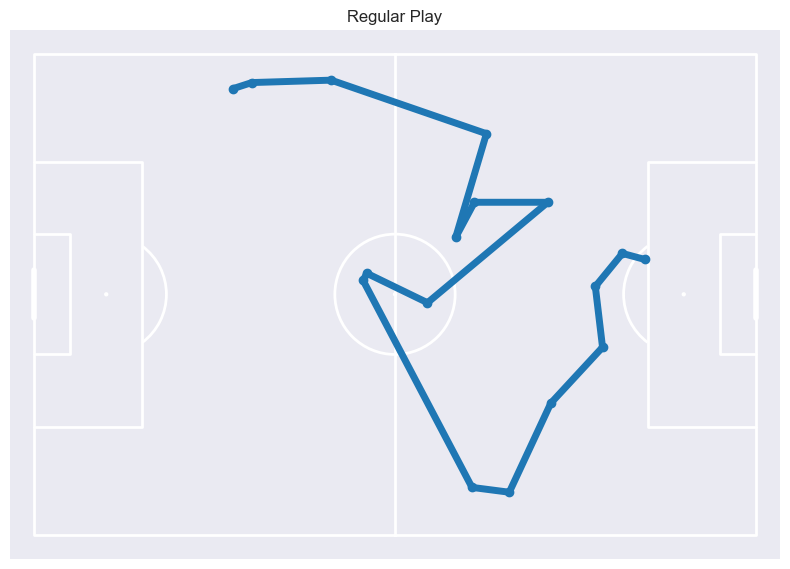

In [5]:
%matplotlib inline
attack = list_offense[11]
attack_coords = attack.get_coords()
lines = []
for i in range(len(attack_coords)):
    if i+1 != len(attack_coords):
        line = [attack_coords[i], attack_coords[i+1]]
        lines.append(line)
p = Pitch(pitch_type = 'statsbomb')
fig, ax = p.draw(figsize=(8,8))
p.scatter(x=[coords[0] for coords in attack_coords], y =[coords[1] for coords in attack_coords],ax=ax)
p.lines(xstart=[coords[0][0] for coords in lines], 
        ystart=[coords[0][1] for coords in lines], 
        xend = [coords[1][0] for coords in lines], 
        yend= [coords[1][1] for coords in lines],
        ax=ax)
plt.title(attack.get_pattern())
plt.show()

In [ ]:
for offense in list_offense:
    offense.plot_offense()